In [70]:
# Import required libraries
import numpy as np
import pandas as pd

# Import the dataset
dataset = pd.read_csv('Telecom_Churn.csv')

# Glance at the first five records
dataset.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [71]:

# Print all the features of the data
dataset.columns


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [72]:
# Churners vs Non-Churners
dataset['churn'].value_counts() #Return a Series containing counts of unique rows in the DataFrame


False    2850
True      483
Name: churn, dtype: int64

To group data by Churn and compute the mean to find out if churners make more customer service calls than non-churners


In [73]:
# Group data by 'Churn' and compute the mean
print(dataset.groupby('churn')['customer service calls'].mean())


churn
False    1.449825
True     2.229814
Name: customer service calls, dtype: float64


Yes! Perhaps unsurprisingly, churners seem to make more customer service calls than non-churners


* To find out if one State has more churners compared to another

In [74]:
# Count the number of churners and non-churners by State
print(dataset.groupby('state')['churn'].value_counts())


state  churn
AK     False    49
       True      3
AL     False    72
       True      8
AR     False    44
                ..
WI     True      7
WV     False    96
       True     10
WY     False    68
       True      9
Name: churn, Length: 102, dtype: int64


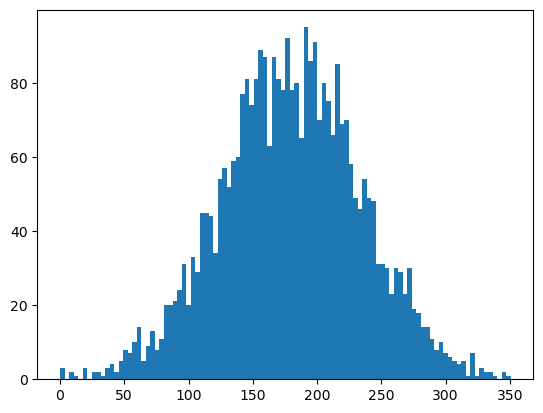

In [75]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Total day minutes'
plt.hist(dataset['total day minutes'], bins = 100)

# Display the plot
plt.show()


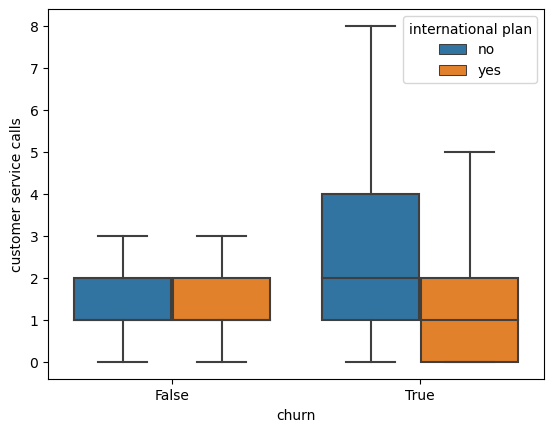

In [76]:
# Create the box plot
sns.boxplot(x = 'churn',
			y = 'customer service calls',
			data = dataset,
			sym = "",	#The default symbol for flier points. An empty string ('') hides the fliers			
			hue = "international plan")
# Display the plot
plt.show()


<span style="color:yellow;font-size:20px">**Many Machine Learning models make certain assumptions about how the data is distributed. Some of the assumptions are as follows:**</span>

* The features are normally distributed
* The features are on the same scale
* The datatypes of features are numeric

In [77]:
X = dataset.iloc[:, 0:20]   #Purely integer-location based indexing for selection by position
                            #X is now a datafram
print(type(X))
X   #returnes values along with column names


<class 'pandas.core.frame.DataFrame'>


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [78]:
X = dataset.iloc[:, 0:20].values    #a 2D array including the values
X

array([['KS', 128, 415, ..., 3, 2.7, 1],
       ['OH', 107, 415, ..., 3, 3.7, 1],
       ['NJ', 137, 415, ..., 5, 3.29, 0],
       ...,
       ['RI', 28, 510, ..., 6, 3.81, 2],
       ['CT', 184, 510, ..., 10, 1.35, 2],
       ['TN', 74, 415, ..., 4, 3.7, 0]], dtype=object)

<ul>
<li><span style="color: #ff6600;">In&nbsp;<em>telco churn</em>&nbsp;<span style="color: #0000ff;">data,&nbsp;<em>Churn</em>,&nbsp;<em>Voice mail plan</em></span>, and,&nbsp;<span style="color: #0000ff;"><em>International plan</em></span>, in particular, are binary features that ca<img src="C:\Users\Mahdi\Desktop\machine learning projects for beginners\customer segmentation\a(i)" alt="" />n easily be&nbsp;converted into 0&rsquo;s and&nbsp;1&rsquo;s</span>.<img style="color: #ff6600;" src="https://html5-editor.net/tinymce/plugins/emoticons/img/smiley-cool.gif" alt="cool" />&nbsp; &nbsp;&nbsp;</li>
</ul>

In [79]:
# Features and Labels
X = dataset.iloc[:, 0:20].values    
y = dataset.iloc[:, 20].values # Churn

# Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder

labelencoder_X_1 = LabelEncoder()
X[:, 5] = labelencoder_X_1.fit_transform(X[:, 5])   #voice mail plan
# X['international plan'] = labelencoder_X_1.fit_transform(X['international plan'])

labelencoder_X_2 = LabelEncoder()
X[:, 4] = labelencoder_X_2.fit_transform(X[:, 4])   #international plan
# X["voice mail plan"] = labelencoder_X_2.fit_transform(X["voice mail plan"])

# Encoding categorical data in y
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)



<ul>
<li><span style="color: #ffff99;"><strong>Encoding State feature using One hot encoding</strong></span></li>
</ul>

In [80]:
# Removing extra column to avoid dummy variable trap
X_State = pd.get_dummies(X[:, 0], drop_first = True)

# Converting X to a dataframe
X = pd.DataFrame(X) #X has been a ndarray,X doesn't have column name,columns have indices

# Dropping the 'State' column
X = X.drop([0], axis = 1)

# Merging two dataframes
frames = [X_State, X]
result = pd.concat(frames, axis = 1, ignore_index = True)

# Final dataset with all numeric features
X = result
X
# X=X.drop([52] , axis=1)
# X[52]

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0,0,0,0,0,0,0,0,0,0,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1
1,0,0,0,0,0,0,0,0,0,0,...,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1
2,0,0,0,0,0,0,0,0,0,0,...,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0
3,0,0,0,0,0,0,0,0,0,0,...,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,0,0,0,0,0,0,0,0,0,...,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,0,1,0,0,0,0,0,0,0,...,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,0,0,0,0,0,0,0,0,0,0,...,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,0,0,0,0,0,0,0,0,0,0,...,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,0,0,0,0,0,1,0,0,0,0,...,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [81]:
X[52]

0       382-4657
1       371-7191
2       358-1921
3       375-9999
4       330-6626
          ...   
3328    414-4276
3329    370-3271
3330    328-8230
3331    364-6381
3332    400-4344
Name: 52, Length: 3333, dtype: object

In [82]:
X=X.drop([52], axis=1)

In [85]:
X[53]   # after eliminating x[52] then there will not be a column named 52 then x[52] will not exist and calling it leads to error

0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: 53, Length: 3333, dtype: object

In [86]:
# Splitting the dataset into the Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
													test_size = 0.2,
													random_state = 0)


In [87]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [88]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)


RandomForestClassifier()

In [89]:
# Predict the labels for the test set
y_pred = clf.predict(X_test)


In [90]:
# Compute accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.952023988005997

In [91]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[575   4]
 [ 28  60]]


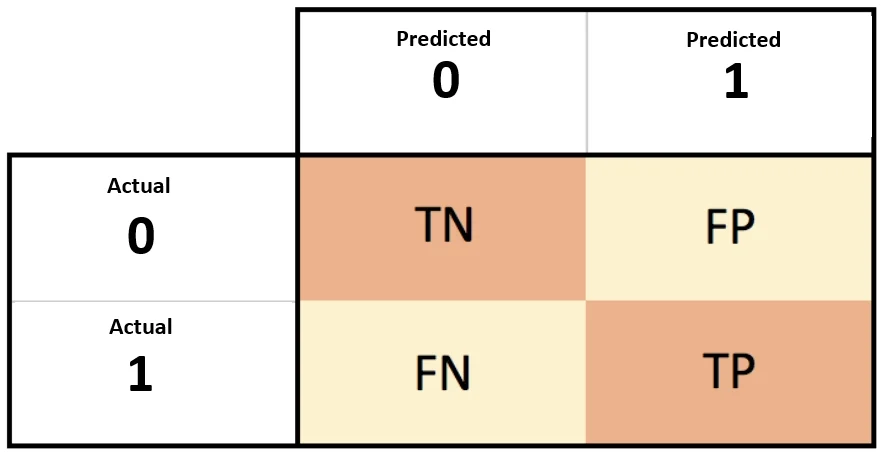

<ul>
<li><span style="color: #ffff00;">True Positives(TP) = 60</span></li>
<li><span style="color: #ffff00;">True Negatives(TN) = 575</span></li>
<li><span style="color: #ffff00;">False Positives(FP) = 4</span></li>
<li><span style="color: #ffff00;">False Negatives(FN) = 28</span></li>
<li><span style="color: #ffff00;">Precision = TP/(TP+FP) </span></li>
<li><span style="color: #ffff00;">Recall = TP/(TP+FN) </span></li>
<li><span style="color: #ffff00;">Accuracy = (TP+TN)/(TP+TN+FP+FN) = 0.9520</span></li>
</ul>